In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv('MarketingCampaignDatabase.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


In [3]:
#Remove and add columns
df = df.iloc[:,2:]
df = df.drop(columns=['Dt_Customer', 'Recency'])
df['Age'] = 2024-df['Year_Birth']
df = df.drop(columns='Year_Birth')
df = df.dropna()
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,4,7,0,0,0,0,0,0,1,67
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,2,5,0,0,0,0,0,0,0,70
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,10,4,0,0,0,0,0,0,0,59
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,4,6,0,0,0,0,0,0,0,40
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,6,5,0,0,0,0,0,0,0,43


In [4]:
#Create dummy variables
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,635,88,546,172,88,88,3,...,1,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,11,1,6,2,1,6,2,...,1,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,426,49,127,111,21,42,1,...,1,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,11,4,20,10,3,5,2,...,1,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,173,43,118,46,27,15,5,...,0,0,1,0,0,1,0,0,0,0


In [5]:
#Descriptive statistics
df.describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.00000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.50361,0.164711,0.217058,0.001354,0.104693,0.386733,0.212545,0.258574,0.034296,0.000903
std,25173.076661,0.536896,0.544181,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.50010,0.371003,0.412335,0.036777,0.306227,0.487112,0.409201,0.437950,0.182030,0.030035
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68522.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

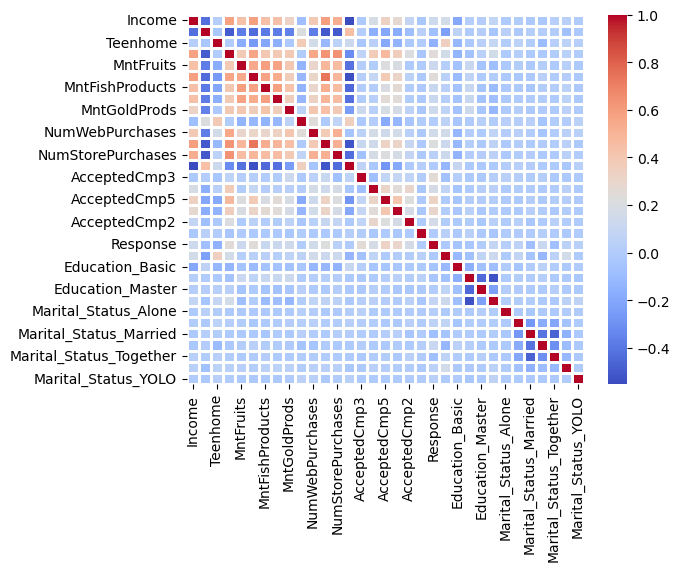

In [6]:
#Data correlation
sns.heatmap(df.corr(), cmap='coolwarm', linecolor='white', linewidths=1)

In [7]:
#Assign values
y = df['Income']
x = df.drop(columns='Income')

In [8]:
#Training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1502)

In [9]:
#Parameter tuning
# Parameter grid
from sklearn.model_selection import ParameterGrid
params = {'n_estimators':range(50, 500, 50)}
grid = ParameterGrid(params)
# List where to store error
mae = []
# Loop
for params in grid:
    #Random forest model
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_estimators=params['n_estimators'], random_state=1502)
    model.fit(x_train, y_train)
    #Predictions
    y_pred = model.predict(x_test)
    #Store error
    from sklearn.metrics import mean_absolute_error
    MAE = mean_absolute_error(y_test, y_pred)
    mae.append(MAE)

In [11]:
#Best parameter
grid[np.argmin(mae)]

{'n_estimators': 50}